In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/My Drive'


yolo training


In [ ]:
from ultralytics import YOLO
import os

args = dict(data=os.path.join(ROOT_DIR, "dyolo.yaml"), epochs=50,task='detect', batch=2,cos_lr = True)
model_variant = "yolov8m"

# Load the YOLOv8 model
model = YOLO(f"{model_variant}.pt")  # load a pretrained model

# Train the model using our arguments from before
# If running remotely they may have been changed by ClearML
results = model.train(**args)

100%|██████████| 49.7M/49.7M [00:00<00:00, 342MB/s]
Ultralytics YOLOv8.0.191 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/My Drive/pfemaster/dyolo/dyolo.yaml, epochs=50, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=Fals

save results

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!scp -r /content/runs '/content/gdrive/My Drive/pfemaster/dyolo'

yolo retraining

In [ ]:
from ultralytics import YOLO
import os
args = dict(data=os.path.join(ROOT_DIR, "dyolo.yaml"), epochs=200,task='detect',batch=2, cos_lr = True,patience=20,resume=True)

# Load a model
model = YOLO('/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/last.pt')   # load a partially trained model

# Resume training
results = model.train(**args)

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/last.pt, data=/content/gdrive/My Drive/pfemaster/dyolo/dyolo.yaml, epochs=200, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False,

FileNotFoundError: ignored

validation data


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/gdrive/My Drive/pfemaster/dyolo/results/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.0.192 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/My Drive/pfemaster/dyolo/labels/val.cache... 720 images, 0 backgrounds, 5 corrupt: 100%|██████████| 720/720 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/val/0dcd39f665976746.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0008]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/val/13b15f0c465adc2a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0087      1.0087]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/val/4cf7e5b67a4dba64.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0008      1.0033      1.0108      1.0042      1.0025       1.005]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/val/80

array([    0.23817,     0.47624,     0.47574])

test data

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/best.pt')
metrics = model.val(data='/content/gdrive/My Drive/pfemaster/dyolo/test902.yaml', split = 'test')
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/My Drive/pfemaster/dyolo/labels/test.cache... 1634 images, 0 backgrounds, 4 corrupt: 100%|██████████| 1634/1634 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/test/6207066168b48349.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0235      1.0272      1.0263      1.0113      1.0263      1.0272]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/test/9133b933cd4f40e0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0031]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/test/96540710c168de54.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0069]
val: WARNING ⚠️ /content/gdrive/My Drive/pfemaster/dyolo/images/test/adf410d74

array([    0.24454,     0.47557,     0.48863])

OCR

In [ ]:
!pip install pillow opencv-python-headless pytesseract numpy


In [ ]:
from PIL import Image, ImageDraw
from ultralytics import YOLO
import cv2
import pytesseract
import numpy as np
import os

# Initialize YOLO model
def initialize_yolo(yolo_weights_path):
    return YOLO(yolo_weights_path)

# Function to detect layout using YOLO and save an image with labels
def detect_layout_and_save_parts(input_image_path, yolo_model, output_folder, confidence_threshold=0.5, nms_threshold=0.4):
    input_image = Image.open(input_image_path)

    # Perform object detection using YOLO
    results = yolo_model(input_image, conf=confidence_threshold, iou=nms_threshold)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a list to store detected text
    detected_text = []

    # Loop through detected bounding boxes
    for i, r in enumerate(results):
        im_array = r.orig_img  # Get the original image from the Results object
        im = Image.fromarray(im_array)  # Create a PIL image from the NumPy array

        # Loop through detected bounding boxes and class values
        for j, (bbox, class_value, confidence) in enumerate(zip(r.boxes.xyxy.tolist(), r.boxes.cls.tolist(), r.boxes.conf.tolist())):
            if confidence > confidence_threshold:  # Check if confidence is above the threshold
                x1, y1, x2, y2 = map(int, bbox)  # Extract bounding box coordinates
                roi = im.crop((x1, y1, x2, y2))  # Crop the bounding box region
                class_label = r.names[class_value]  # Use the class value to get the label

                # Save the individual detected part as an image with a unique filename
                part_image_path = os.path.join(output_folder, f'part_{i}_{j}_{class_label}.png')
                roi.save(part_image_path)

                # Append the detected text along with its label and image path
                detected_text.append({"label": class_label, "text": None, "image_path": part_image_path})

    return detected_text




# Example usage:
# Initialize YOLO model
yolo_model = initialize_yolo('/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/best.pt')

# Detect layout and get bounding boxes, and save the image with labels
bounding_boxes = detect_layout_and_save_parts('im.jpg', yolo_model, 'output_image_with_labels')



FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/best.pt'

detect with threshold

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np

# Initialize YOLO model
model = YOLO('/content/gdrive/MyDrive/best-200.pt')

# Load and resize the image to 640x640
input_image = Image.open('f574b49a071a9fb2.jpg')

# Perform prediction with NMS and confidence threshold
results = model.predict(input_image, conf=0.3,iou=0.5)

# Convert PIL image to NumPy array
input_image_np = np.array(input_image)

filtered_boxes = []

# Process the results with NMS and confidence threshold
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get the predicted boxes as numpy array
    confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores
    for box, confidence in zip(boxes, confidences):
       # if confidence > 0.5:  # Filter boxes with confidence > 10%
            r = box.astype(int)  # Get the box coordinates as integers
            filtered_boxes.append(r)  # Append the filtered boxes to the list
            # Draw boxes on the image
            cv2.rectangle(input_image_np, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 2)

# Convert the NumPy array back to a PIL image for displaying and saving
output_image = Image.fromarray(input_image_np)

# Save the image with filtered boxes
if filtered_boxes:
    output_image.save('paragtest.jpg')
    print("Image with filtered boxes saved.")
else:
    print("No boxes with confidence > 0.1 found.")

# Show the image with filtered boxes
output_image.show()


TypeError: ERROR ❌️ /content/gdrive/MyDrive/best-200.pt appears to be an Ultralytics YOLOv5 model originally trained with https://github.com/ultralytics/yolov5.
This model is NOT forwards compatible with YOLOv8 at https://github.com/ultralytics/ultralytics.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'

In [ ]:
# Run inference on 'bus.jpg'
from PIL import Image

results = model('f574b49a071a9fb2.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results2.jpg')  # save image



image 1/1 /content/f574b49a071a9fb2.jpg: 448x640 24 paragraphs, 40 lines, 52 words, 2171.2ms
Speed: 10.7ms preprocess, 2171.2ms inference, 9.6ms postprocess per image at shape (1, 3, 448, 640)


based on class


In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np

model = YOLO('/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/best.pt')

# Load and resize the image to 640x640
input_image = Image.open('sample.jpg')
results = model.predict(input_image, classes=0)  # Using an IoU threshold of 0.4 for NMS

# Convert PIL image to NumPy array
input_image_np = np.array(input_image)

filtered_boxes = []

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get the predicted boxes as numpy array
    confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores

    for box, confidence in zip(boxes, confidences):
        r = box.astype(int)  # Get the box coordinates as integers
        filtered_boxes.append(r)  # Append the boxes to the list without filtering based on confidence

    # Sort the boxes based on their y-coordinate (top of the bounding box)
    filtered_boxes.sort(key=lambda x: x[1])  # Sorting based on the y-coordinate (index 1)

# Save the boxes' coordinates in a structured manner
with open('box_coordinates.txt', 'w') as f:
    for box in filtered_boxes:
        f.write(f"{box[0]} {box[1]} {box[2]} {box[3]}\n")

# Draw sorted boxes on the image
for r in filtered_boxes:
    cv2.rectangle(input_image_np, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 2)

# Convert the NumPy array back to a PIL image for displaying and saving
output_image = Image.fromarray(input_image_np)

# Save the image with sorted boxes
if filtered_boxes:
    output_image.save('0.jpg')
    print("Image with sorted boxes saved.")
else:
    print("No boxes found.")

# Show the image with sorted boxes
output_image.show()



0: 640x448 4 paragraphs, 2118.5ms
Speed: 21.8ms preprocess, 2118.5ms inference, 32.3ms postprocess per image at shape (1, 3, 640, 448)


Image with sorted boxes saved.


box txt img


In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
import os

model = YOLO('/content/gdrive/My Drive/pfemaster/dyolo2/resultdyolo2+1/runs/detect/train/weights/best.pt')

# Load and resize the image to 640x640
input_image = Image.open('test.jpg')
results = model.predict(input_image, classes=1,conf=0.5,iou=0.4)  # Using an IoU threshold of 0.4 for NMS

# Convert PIL image to NumPy array
input_image_np = np.array(input_image)

# Create a directory to save cropped images and bounding box coordinates if it doesn't exist
output_folder = 'cropped_images'
os.makedirs(output_folder, exist_ok=True)

# Initialize variables to store bounding boxes and their y-coordinate position
bounding_boxes = []
bounding_box_y_positions = []

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get the predicted boxes as numpy array
    confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores

    for box, confidence in zip(boxes, confidences):
        r = box.astype(int)  # Get the box coordinates as integers
        bounding_boxes.append(r)  # Append the boxes to the list without filtering based on confidence
        bounding_box_y_positions.append((r[1] + r[3]) // 2)  # Calculate the y-coordinate position

# Sort the boxes based on their y-coordinate positions from top to bottom
sorted_indices = np.argsort(bounding_box_y_positions)
bounding_boxes = [bounding_boxes[i] for i in sorted_indices]

# Save each bounding box and its corresponding cropped image in the sorted order
for i, bbox in enumerate(bounding_boxes):
    x1, y1, x2, y2 = bbox  # Get box coordinates
    cropped_image = input_image.crop((x1, y1, x2, y2))  # Crop the bounding box region
    cropped_image_path = os.path.join(output_folder, f'box_{i}.jpg')  # Define cropped image path
    cropped_image.save(cropped_image_path)  # Save the cropped image

    # Save bounding box coordinates in a text file
    with open(os.path.join(output_folder, 'bounding_boxes.txt'), 'a') as f:
        f.write(f"box_{i}.jpg {x1} {y1} {x2} {y2}\n")

    # Draw boxes on the original image
    cv2.rectangle(input_image_np, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

# Convert the NumPy array back to a PIL image for displaying and saving
output_image = Image.fromarray(input_image_np)

# Save the image with sorted boxes
output_image.save('boxessample.jpg')
print("Image with sorted boxes saved.")

# Show the image with sorted boxes
output_image.show()



0: 640x384 6 lines, 1612.5ms
Speed: 21.5ms preprocess, 1612.5ms inference, 25.6ms postprocess per image at shape (1, 3, 640, 384)
Image with sorted boxes saved.


preprocessing


In [ ]:
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np
import tempfile

def normalize_image(img):
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    return cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

def deskew(image):
    co_ords = np.column_stack(np.where(image.sum(axis=2)>=300))

    angle = cv2.minAreaRect(co_ords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

def erode_text(image):
    kernel = np.ones((1, 1), np.uint8)  # Adjust the kernel size for erosion
    return cv2.erode(image, kernel, iterations=1)
def image_scaling(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def thinning(image):
    kernel = np.ones((1, 1), np.uint8)  # Smaller kernel size for increased thinning effect
    return cv2.erode(image, kernel, iterations=1)



def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresholding(image):
    # Adjust the threshold value (lower than 100) to make the text thinner
    _, thresh = cv2.threshold(image, 69, 255, cv2.THRESH_BINARY)
    return thresh
# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    # Grayscale Conversion
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Image.fromarray(img_gray).save('gray_image.jpg')

    # Normalization
    img_normalized = normalize_image(img_gray)
    Image.fromarray(img_normalized).save('normalized_image.jpg')

    # Image Scaling using the normalized image
    scaled_img = cv2.imread('normalized_image.jpg')  # Load the normalized image
    file_path = image_scaling('normalized_image.jpg')  # Use the normalized image for scaling
    img_scaled = cv2.imread(file_path)
    Image.fromarray(img_scaled).save('scaled_image.jpg')

    # Noise Removal
    img_denoised = remove_noise(img_scaled)
    Image.fromarray(img_denoised).save('denoised_image.jpg')

    # Thinning and Skeletonization
    img_thinned = thinning(img_denoised)
    Image.fromarray(img_thinned).save('thinned_image.jpg')

    # Thresholding
    img_thresholded = thresholding(img_thinned)
    Image.fromarray(img_thresholded).save('thresholded_image.jpg')

    # Erosion for text thickness reduction
    img_eroded = erode_text(img_thresholded)
    Image.fromarray(img_eroded).save('eroded_image.jpg')

    return img_eroded

# Example usage:
input_image_path = '/content/cropped_images/box_5.jpg'  # Replace 'your_image_path.jpg' with your image path
preprocessed_image = preprocess_image(input_image_path)
output_path = 'preprocessed_image5.jpg'  # Set the output file path

Image.fromarray(preprocessed_image).save(output_path)


<ipython-input-42-76a1276b8621>:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im_resized = im.resize(size, Image.ANTIALIAS)


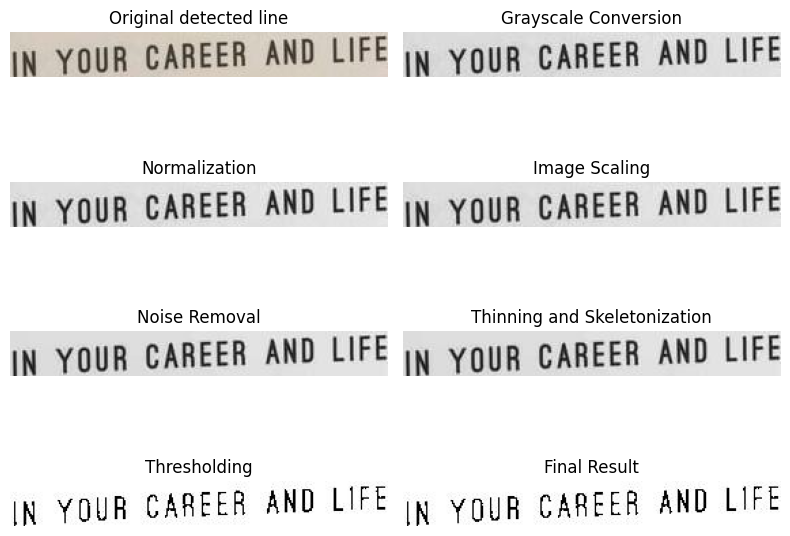

In [ ]:
# Define the image paths for each step
input_image_path = '/content/cropped_images/box_3.jpg'
gray_image_path = 'gray_image.jpg'
normalized_image_path = 'normalized_image.jpg'
scaled_image_path = 'scaled_image.jpg'
denoised_image_path = 'denoised_image.jpg'
thinned_image_path = 'thinned_image.jpg'
thresholded_image_path = 'thresholded_image.jpg'
eroded_image_path = 'eroded_image.jpg'
result_image_path = 'preprocessed_image.jpg'

# Paths and titles for each step
steps_paths = [
    input_image_path,
    gray_image_path,
    normalized_image_path,
    scaled_image_path,
    denoised_image_path,
    thinned_image_path,
    thresholded_image_path,
    eroded_image_path,
    result_image_path
]

step_titles = [
    'Original detected line',
    'Grayscale Conversion',
    'Normalization',
    'Image Scaling',
    'Noise Removal',
    'Thinning and Skeletonization',
    'Thresholding',
    'Final Result'
]

plt.figure(figsize=(8, 8))  # Adjust the figure size if needed

for i, (step_path, title) in enumerate(zip(steps_paths, step_titles), 1):
    plt.subplot(5, 2, i)
    plt.imshow(plt.imread(step_path), cmap='gray')  # Assuming images are grayscale
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pytesseract
!pip install tesseract
!apt-get install tesseract-ocr
!sudo apt-get install tesseract-ocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562550 sha256=ff81bd0bc36159ea37bb3ef013913d9bd9ce30370f9a85f0b77ab22b0e72a670
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://

In [ ]:
def apply_ocr_on_preprocessed_image(preprocessed_image):
    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(preprocessed_image)

    # Apply OCR to the preprocessed region
    text = pytesseract.image_to_string(pil_image, config='--psm 11 --oem 3 -l eng')

    return text


In [ ]:
from PIL import Image
import pytesseract
import cv2

def apply_ocr_on_preprocessed_images(image_paths, output_file='extracted_text.txt'):
    extracted_text = []

    for idx, image_path in enumerate(image_paths):
        # Load the preprocessed image using OpenCV
        preprocessed_image = cv2.imread(image_path)


        # Apply OCR to the preprocessed image
        text = pytesseract.image_to_string(preprocessed_image, config='--psm 11 --oem 3 -l eng')

        # Format and store extracted text with line numbers
        formatted_text = f"Line {idx}: {text}"
        extracted_text.append(formatted_text)

    # Write the extracted text to a text file in the order of input images
    with open(output_file, 'w') as file:
        for text in extracted_text:
            file.write(text + '\n\n')

    print(f"Extracted text saved to {output_file}")

# Example usage:
preprocessed_image_paths = ['results0.jpg', 'preprocessed_image1.jpg', 'preprocessed_image.jpg', 'preprocessed_image4.jpg', 'preprocessed_image5.jpg']
apply_ocr_on_preprocessed_images(preprocessed_image_paths)


Extracted text saved to extracted_text.txt


## spell checker

In [ ]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.3 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

# Sample extracted text from OCR
extracted_text = " ANO ACHIEVEMENT"

# Split text into words
words = extracted_text.split()

# Initialize spellchecker
spell = SpellChecker()

# Identify and correct misspelled words
corrected_text = []
for word in words:
    # Check if word is misspelled
    if spell.unknown([word]):
        # Get the corrected word if misspelled
        corrected_word = spell.correction(word)
        corrected_text.append(corrected_word)
    else:
        corrected_text.append(word)

# Reconstruct the corrected text
corrected_text = ' '.join(corrected_text)

print("Original Extracted Text:", extracted_text)
print("Corrected Text:", corrected_text)


Original Extracted Text:  ANO ACHIEVEMENT
Corrected Text: ANO ACHIEVEMENT


## Speech conversion

In [ ]:
!pip install gTTs


In [ ]:
from gtts import gTTS
import os

# Read the text file and extract text
text_file_path = 'extracted_text.txt'
extracted_text = []

with open(text_file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.strip():  # Skip empty lines
            label, text = line.strip().split(': ')
            extracted_text.append((label, text))

# Combine the extracted text into a single string
text_to_speak = ' '.join([text for (_, text) in extracted_text])

# Language for text-to-speech
language = 'en'

# Create a gTTS object
tts = gTTS(text=text_to_speak, lang=language, slow=False)

# Save the converted audio in an mp3 file
output_file = "output.mp3"
tts.save(output_file)

# Playing the converted audio
os.system(f"mpg321 {output_file}")


32512